# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.239576e+01     1.404616e+01
 * time: 0.0034317970275878906
     1     6.287926e+01     8.180384e+00
 * time: 0.009505987167358398
     2     5.644976e+01     1.201757e+01
 * time: 0.023024797439575195
     3     4.236628e+01     8.910279e+00
 * time: 0.04161381721496582
     4     3.445964e+01     9.081591e+00
 * time: 0.06035900115966797
     5     1.408955e+01     3.914312e+00
 * time: 0.07866477966308594
     6     1.144533e+01     3.766083e+00
 * time: 0.18300890922546387
     7     9.115901e+00     2.481557e+00
 * time: 0.1963210105895996
     8     7.228284e+00     2.838736e+00
 * time: 0.21017980575561523
     9     6.455598e+00     1.576626e+00
 * time: 0.22370100021362305
    10     6.071474e+00     1.193500e+00
 * time: 0.23440885543823242
    11     5.857330e+00     1.441129e+00
 * time: 0.24518489837646484
    12     5.737092e+00     7.644443e-01
 * time: 0.25600481033325195
    13     5.724518e+00     1.218187e+00
 * ti

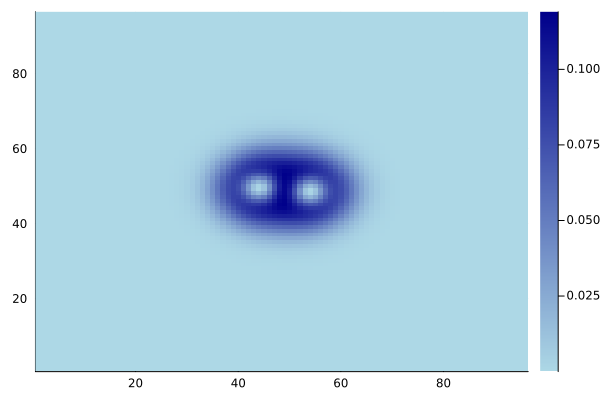

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)